In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

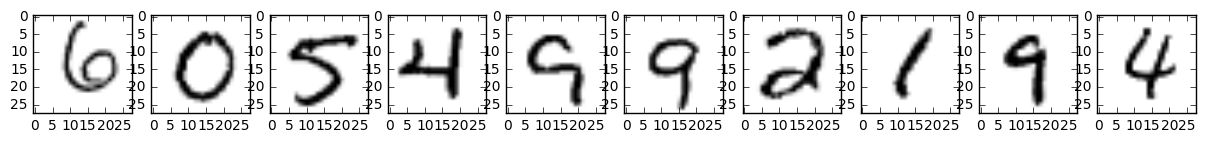

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
import tensorflow as tf
import tensorlayer as tl

In [7]:
# Set parameters
n_epoch = 5
batch_size = 250
print_freq = 1

In [8]:
# TF graph input
x = tf.placeholder('float', [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder('float', [None,10]) # 0-9 digits recognition => 10 classes

In [9]:
network = tl.layers.InputLayer(x, name='input_layer')
network = tl.layers.ReshapeLayer(network, [-1, 28, 28, 1])

network = tl.layers.Conv2dLayer(network,act = tf.nn.relu,shape = [3, 3, 1, 32],  name ='cnn_32_1')
network = tl.layers.Conv2dLayer(network,act = tf.nn.relu,shape = [3, 3, 32, 32], name ='cnn_32_2')
network = tl.layers.MaxPool2d(network, (2,2), name='cnn_maxpool_1')
        
network = tl.layers.Conv2dLayer(network,act = tf.nn.relu,shape = [3, 3, 32, 64], name ='cnn_64_1')
network = tl.layers.Conv2dLayer(network,act = tf.nn.relu,shape = [3, 3, 64, 64], name ='cnn_64_2')
network = tl.layers.MaxPool2d(network, (2,2), name='cnn_maxpool_2')

network = tl.layers.FlattenLayer(network, name='flatten')

network = tl.layers.DropoutLayer(network, keep=0.75, name='drop1')
network = tl.layers.DenseLayer(network, n_units=256,act = tf.nn.relu, name='relu1')
network = tl.layers.DropoutLayer(network, keep=0.75, name='drop2')
network = tl.layers.DenseLayer(network, n_units=10, name='output_layer')

y_hat = network.outputs
pred  = tf.nn.softmax(network.outputs)

  tensorlayer:Instantiate InputLayer  input_layer: (?, 784)
  tensorlayer:Instantiate ReshapeLayer reshape_layer: (?, 28, 28, 1)
  tensorlayer:Instantiate Conv2dLayer cnn_32_1: [3, 3, 1, 32], [1, 1, 1, 1], SAME, relu
  tensorlayer:Instantiate Conv2dLayer cnn_32_2: [3, 3, 32, 32], [1, 1, 1, 1], SAME, relu
  tensorlayer:Instantiate PoolLayer   cnn_maxpool_1: [1, 2, 2, 1], [1, 2, 2, 1], SAME, max_pool
  tensorlayer:Instantiate Conv2dLayer cnn_64_1: [3, 3, 32, 64], [1, 1, 1, 1], SAME, relu
  tensorlayer:Instantiate Conv2dLayer cnn_64_2: [3, 3, 64, 64], [1, 1, 1, 1], SAME, relu
  tensorlayer:Instantiate PoolLayer   cnn_maxpool_2: [1, 2, 2, 1], [1, 2, 2, 1], SAME, max_pool
  tensorlayer:Instantiate FlattenLayer flatten: 3136
  tensorlayer:Instantiate DropoutLayer drop1: keep: 0.750000
  tensorlayer:Instantiate DenseLayer  relu1: 256, relu
  tensorlayer:Instantiate DropoutLayer drop2: keep: 0.750000
  tensorlayer:Instantiate DenseLayer  output_layer: 10, identity


In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_hat,y))

In [11]:
train_params = network.all_params
with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.AdamOptimizer()
    learn     = optimizer.minimize(cost, var_list=train_params)

In [12]:
# Test the model, Calculate accuracy
predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(predictions, "float"))

In [13]:
# Initializing the variables
init = tf.global_variables_initializer()

# Merge all summaries into a single operator
merged_summary_op = tf.merge_all_summaries()

In [14]:
# Launch the graph
sess = tf.InteractiveSession()

# Logs and graph for tensorboard
summary_writer = tf.train.SummaryWriter('./tensorboard', graph=sess.graph)

# Init the session
sess.run(init)

In [15]:
# train the network
tl.utils.fit(sess, network, learn, cost, mnist.train.images, mnist.train.labels, x, y,
             acc=acc, batch_size=batch_size, n_epoch=n_epoch, print_freq=print_freq, 
             X_val=mnist.test.images, y_val=mnist.test.labels, eval_train=False)


Start training the network ...
Epoch 1 of 5 took 168.313020s
   val loss: 0.060478
   val acc: 0.978900
Epoch 2 of 5 took 173.112033s
   val loss: 0.042195
   val acc: 0.985600
Epoch 3 of 5 took 160.265594s
   val loss: 0.029994
   val acc: 0.989800
Epoch 4 of 5 took 160.884437s
   val loss: 0.027839
   val acc: 0.991500
Epoch 5 of 5 took 160.853734s
   val loss: 0.021990
   val acc: 0.992400
Total training time: 886.362863s


In [16]:
# evaluation
tl.utils.test(sess, network, acc, mnist.test.images, mnist.test.labels, x, y, batch_size=None)

Start testing the network ...
   test acc: 0.992400


In [17]:
dp_dict = tl.utils.dict_to_one( network.all_drop )
dp_dict

{<tf.Tensor 'Placeholder_2:0' shape=<unknown> dtype=float32>: 1,
 <tf.Tensor 'Placeholder_3:0' shape=<unknown> dtype=float32>: 1}

In [26]:
# test item #100 is a "six"
pixels = mnist.test.images[100]

feed_dict = {x:[pixels]}
feed_dict.update(dp_dict)

result = sess.run(pred, feed_dict=feed_dict)
dict(zip(range(10), result[0]))

{0: 4.3873069e-07,
 1: 1.3470794e-09,
 2: 1.0436401e-09,
 3: 1.6347726e-10,
 4: 8.1285486e-07,
 5: 2.0735943e-06,
 6: 0.99999654,
 7: 1.3542251e-10,
 8: 1.1018233e-07,
 9: 1.0552289e-10}

In [29]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

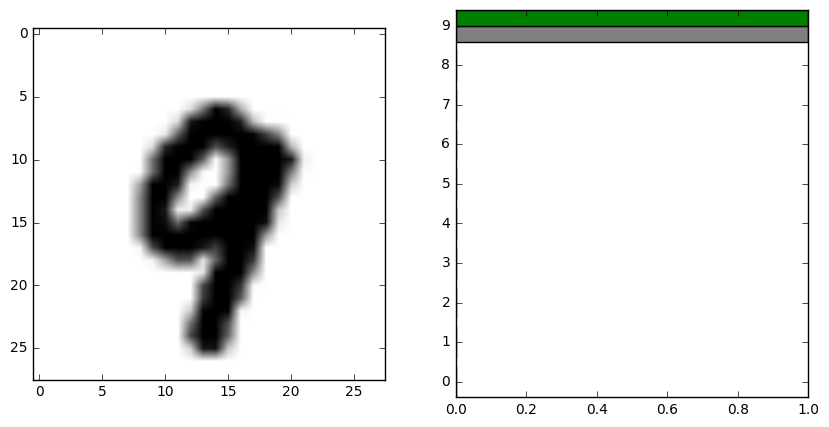

In [30]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]

feed_dict = {x:[pixels]}
feed_dict.update(dp_dict)
result = sess.run(pred, feed_dict=feed_dict)[0]

test_render(pixels, result, truth)

In [31]:
### What went wrong?
pixels = mnist.test.images
truth = mnist.test.labels

feed_dict = {x:pixels}
feed_dict.update(dp_dict)
result = sess.run(y_hat, feed_dict=feed_dict)

result

array([[ -4.44423389,   0.95530003,  -0.92521483, ...,  16.49233818,
         -4.37119102,   1.97492182],
       [  1.98336017,   5.94114542,  19.10739708, ...,  -7.10815907,
          0.24027698,  -9.78778648],
       [ -2.64180732,  12.18086147,  -1.94026864, ...,  -0.8936699 ,
         -2.03310704,  -3.89890075],
       ..., 
       [ -9.33072281,   0.05890548,  -6.01281452, ...,   2.54068232,
         -1.18150687,   1.88439977],
       [ -3.50148416,  -5.80278683,  -8.98208046, ...,  -7.73885012,
          6.58756351,  -4.68569422],
       [  0.4328554 ,  -4.70492363,  -0.11036494, ..., -10.36951065,
         -1.25604105,  -6.60827541]], dtype=float32)

In [32]:
acc = result.argmax(axis=1) == truth.argmax(axis=1)
incorrect = np.argwhere(acc==False).flatten()

print("Incorrect predictions: {}".format(len(incorrect)))

Incorrect predictions: 76


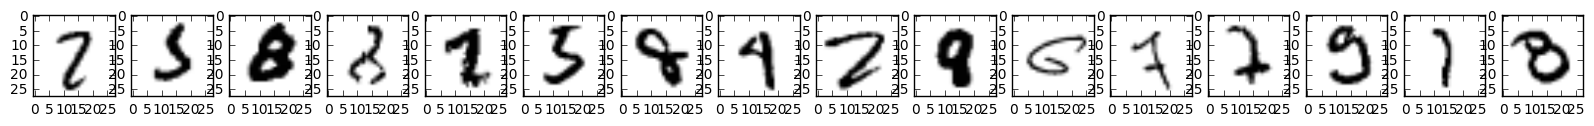

In [33]:
plt.figure(figsize=(20,5))
plt_idx = 1
for i in list(incorrect[:16]):
    plt.subplot(1, 16, plt_idx)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
    plt_idx += 1
plt.show()

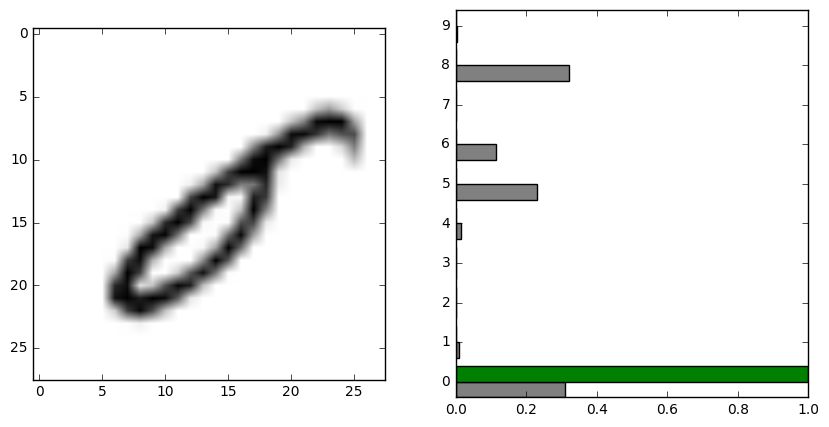

In [34]:
i = random.choice(list(incorrect))

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]

feed_dict = {x:[pixels]}
feed_dict.update(dp_dict)
result = sess.run(pred, feed_dict=feed_dict)[0]

test_render(pixels, result, truth)

In [25]:
# Close the Session when we're done.
# sess.close()